# Data Preprocessing

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

## Import the data

In [12]:
df = pd.read_csv("train.csv")
df.drop('Id', axis = 1, inplace = True)
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [13]:
train = df.drop("SalePrice", axis = 1)
test = pd.read_csv("test.csv").drop("Id", axis = 1)
y = df.SalePrice.values

In [14]:
train.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

In [15]:
data = train.append(test, ignore_index=True)

In [16]:
#data.drop(["YrSold", "MoSold"], axis = 1, inplace = True)
#data.drop(["PoolQC", "MiscFeature", "Fence", "FireplaceQu", "LotFrontage"], axis = 1, inplace = True)
# too many missingvalues

## Dealing with Missing Values

In [10]:
total = data.shape[0]
missingvalue = total - data.count()
missingvalue = missingvalue[missingvalue > 0]#.sort_values(inplace = True)
missingvalue.sort_values(ascending=False, inplace = True)
mcols = missingvalue.index
print missingvalue[missingvalue > 0]
#print missingvalue

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64


In [8]:
# drop_features = ['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'LotFrontage'] # due to so many missing values
# data.drop(labels=drop_features, axis = 1, inplace = True)
data['Alley'].fillna("Missing", inplace = True) # or Alley Can be dropped

### Garage Missing Values

In [9]:
#data[data.GarageYrBlt.isnull()].filter(regex = "Garage").count()
print "Some of the houses don't have a garge, so the Garage related features are NA's.\n"
#print data[data.GarageYrBlt.isnull()].filter(regex = "Garage").dtypes
gcols = data.filter(regex = 'Garage').columns
for col in gcols:
    if data[col].dtypes == 'object': 
        print "Col: %s, fill with Missing." %col
        data[col].fillna("Missing", inplace = True)
    else: 
        print "Col: %s, fill with 0." %col
        data[col].fillna(0, inplace = True)

Some of the houses don't have a garge, so the Garage related features are NA's.

Col: GarageType, fill with Missing.
Col: GarageYrBlt, fill with 0.
Col: GarageFinish, fill with Missing.
Col: GarageCars, fill with 0.
Col: GarageArea, fill with 0.
Col: GarageQual, fill with Missing.
Col: GarageCond, fill with Missing.


### Basement Missing Values

In [10]:
print data[data.isnull()].filter(regex = 'Bsmt').columns.values
print "\n"
print data.filter(regex = 'Bsmt').dtypes.value_counts()

['BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1'
 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'BsmtFullBath'
 'BsmtHalfBath']


float64    6
object     5
dtype: int64


#### Grouping BsmtFinType1/2

BsmtFinType2  ALQ  BLQ  GLQ  LwQ  Rec  Unf
BsmtFinType1                              
ALQ             0   30    3   27   36  333
BLQ             4    1   10   23   34  197
GLQ            15    7    0   17   19  790
LwQ            14   11   14    0   16   99
Rec            19   19    7   20    0  223
Unf             0    0    0    0    0  851


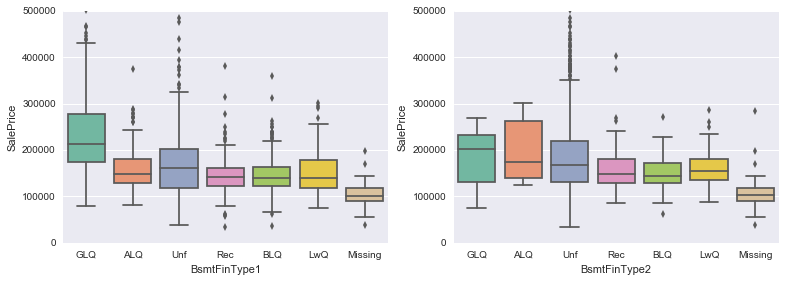

In [11]:
df['BsmtFinType1'].fillna("Missing", inplace = True)
df['BsmtFinType2'].fillna("Missing", inplace = True)
contab = pd.crosstab(data.BsmtFinType1, data.BsmtFinType2)
print contab
orders = ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ', 'Missing']
fig, ax = plt.subplots(1, 2, figsize = (11, 4))
sns.boxplot('BsmtFinType1', 'SalePrice', palette='Set2', data = df, order = orders, ax = ax[0]).set(ylim = (0, 500000))
sns.boxplot('BsmtFinType2', 'SalePrice', palette='Set2', data = df, order = orders, ax = ax[1]).set(ylim = (0, 500000))
plt.tight_layout()

In [12]:
bsm_type_dict = {'GLQ': 'GLQ', 'ALQ': 'ALQ', 'Unf': 'ALQ', 'Rec': 'ALQ', 'BLQ': 'ALQ','LwQ': 'ALQ', 'Missing': 'Missing'}
for col in ['BsmtFinType1', 'BsmtFinType2']:
    data[col].fillna('Missing', inplace = True)
    data[col] = data[col].map(bsm_type_dict)
    print "Col: {0}, {1}".format(col, data[col].unique())

Col: BsmtFinType1, ['GLQ' 'ALQ' 'Missing']
Col: BsmtFinType2, ['ALQ' 'Missing' 'GLQ']


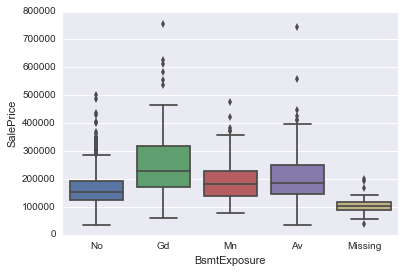

In [13]:
data.BsmtExposure.unique()
df['BsmtExposure'].fillna("Missing", inplace = True)
sns.boxplot('BsmtExposure', 'SalePrice', data = df)
data['BsmtExposure'].fillna("Missing", inplace = True)

#### Combining BsmtCond & BsmtQual

In [14]:
contab = pd.crosstab(data.BsmtQual, data.BsmtCond)
print contab
chi, pvalue, ddof, ct = stats.chi2_contingency(contab, correction = False)
print "\nThe p-value is %s."%pvalue

BsmtCond  Fa  Gd  Po    TA
BsmtQual                  
Ex         0  23   1   234
Fa        22   2   3    61
Gd         9  66   0  1133
TA        72  31   1  1177

The p-value is 7.56742208885e-49.


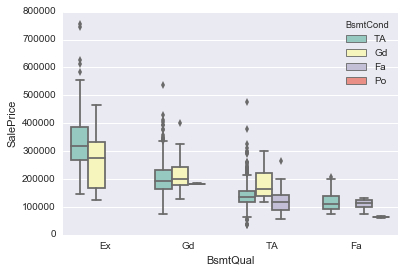

In [15]:
sns.boxplot('BsmtQual', 'SalePrice', data = df, hue = 'BsmtCond', palette = 'Set3', order = ['Ex', 'Gd', 'TA', 'Fa'])

In [16]:
ord_dic1 = {'Ex': 6, 'Gd': 3, 'TA': 3, 'Fa': 2, 'Po': 0}
ord_dic2 = {'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
data['BsmtCond1'] = data['BsmtCond'].map(ord_dic1)
data['BsmtQual1'] = data['BsmtQual'].map(ord_dic2)
data['BsmtQC'] = data['BsmtCond1']*data['BsmtQual1']
data['BsmtQC'].fillna(-99, inplace = True)
data.drop(labels = ['BsmtCond', 'BsmtCond1', 'BsmtQual', 'BsmtQual1'], axis =1,  inplace = True)

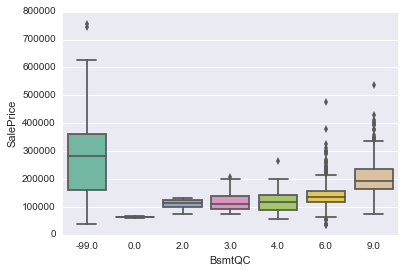

In [17]:
df['BsmtCond1'] = df['BsmtCond'].map(ord_dic1)
df['BsmtQual1'] = df['BsmtQual'].map(ord_dic2)
df['BsmtQC'] = df['BsmtCond1']*df['BsmtQual1']
df['BsmtQC'].fillna(-99, inplace = True)
sns.boxplot('BsmtQC', 'SalePrice', data = df, palette = 'Set2')

In [18]:
# plt.scatter(df.BsmtQC, df.SalePrice, c = 'orange')
# plt.xlim(-1,20)

### MasVnr

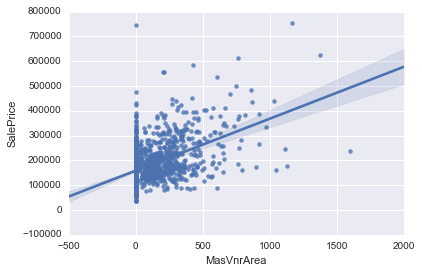

In [19]:
mas = data.filter(regex = 'Mas')
mas = mas[mas.MasVnrArea.notnull()]
#sns.distplot(mas.MasVnrArea, kde = False)
sns.regplot('MasVnrArea', 'SalePrice', data = df)

In [20]:
data['MasVnrArea'].fillna(0, inplace = True)

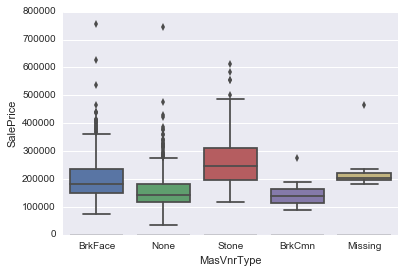

In [21]:
df['MasVnrType'].fillna('Missing', inplace = True)
sns.countplot('MasVnrType', data = df)
sns.boxplot('MasVnrType', 'SalePrice', data = df)

In [22]:
data['MasVnrType'].fillna("Missing", inplace = True)

In [23]:
total = data.shape[0]
missingvalue = total - data.count()
missingvalue = missingvalue[missingvalue > 0]
print missingvalue

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Electrical      1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
SaleType        1
dtype: int64


In [24]:
def impute_values_with_most_frequent(col_name):
    most_freq_val = data[col_name].value_counts().sort_values(ascending = False).index.values[0]
    print "Col: {0}, {1}".format(col_name, most_freq_val)
    data[col_name].fillna(most_freq_val, inplace = True)

In [25]:
for col in missingvalue.index.values:
    impute_values_with_most_frequent(col)

Col: MSZoning, RL
Col: Utilities, AllPub
Col: Exterior1st, VinylSd
Col: Exterior2nd, VinylSd
Col: BsmtFinSF1, 0.0
Col: BsmtFinSF2, 0.0
Col: BsmtUnfSF, 0.0
Col: TotalBsmtSF, 0.0
Col: Electrical, SBrkr
Col: BsmtFullBath, 0.0
Col: BsmtHalfBath, 0.0
Col: KitchenQual, TA
Col: Functional, Typ
Col: SaleType, WD


# Transforming the Ordinal Features

In [26]:
order_col = data.filter(regex = 'Qu|QC|Cond$').select_dtypes(include = ["object"]).columns
ord_dic = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: -99}
for col in order_col:
    print "{0}: \t{1}".format(col, data[col].unique())
#     data[col] = data[col].map(ord_dic)
    data[col].fillna("Missing", inplace = True)

ExterQual: 	['Gd' 'TA' 'Ex' 'Fa']
ExterCond: 	['TA' 'Gd' 'Fa' 'Po' 'Ex']
HeatingQC: 	['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual: 	['Gd' 'TA' 'Ex' 'Fa']
GarageQual: 	['TA' 'Fa' 'Gd' 'Missing' 'Ex' 'Po']
GarageCond: 	['TA' 'Fa' 'Missing' 'Gd' 'Po' 'Ex']


In [27]:
df.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [28]:
# print "Performing the chi2 test on between FireplaceQu and HeatingQC"
# contab = pd.crosstab(data.FireplaceQu, data.HeatingQC, margins=True)
# chi, pvalue, ddof, contingen_table = stats.chi2_contingency(contab)
# print "pvalue = %s, so couldn't reject null hypothesis" %pvalue 
# print "Since so many NA's in FireplaceQu, will remove it and rely on HeatingQC to predict SalePrice."

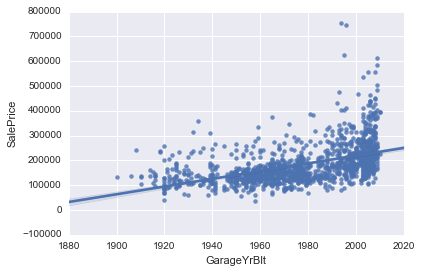

In [29]:
sns.regplot('GarageYrBlt', 'SalePrice', data = df)

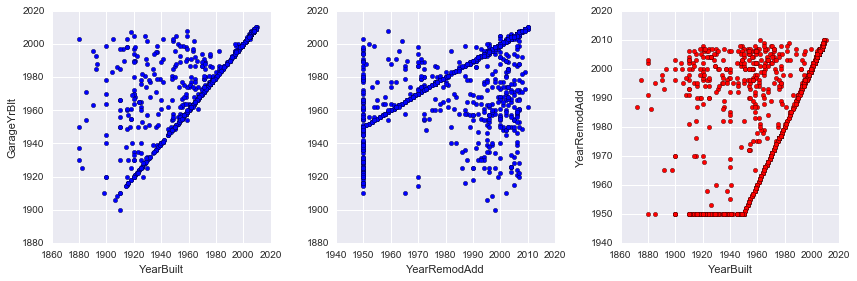

In [30]:
fig, ax = plt.subplots(1, 3, sharey = False, figsize = (12, 4))

ax[0].scatter(df.YearBuilt.values, df.GarageYrBlt.values)
ax[0].set_xlabel('YearBuilt')
ax[0].set_ylabel('GarageYrBlt')
ax[1].scatter(df.YearRemodAdd.values, df.GarageYrBlt.values)
ax[1].set_xlabel('YearRemodAdd')
ax[2].scatter(df.YearBuilt.values, df.YearRemodAdd.values, c='r')
ax[2].set_xlabel('YearBuilt')
plt.ylabel('YearRemodAdd')
plt.tight_layout()

# Save the data to file for modeling

In [31]:
nrows = df.shape[0]
data.rename({'1stFlrSF': 'X1stFlrSF', '2ndFlrSF': 'X2ndFlrSF','3SsnPorch': 'X3SsnPorch'}, inplace= True)
train_clean = data.loc[0:(nrows-1), :]
y = df['SalePrice'].values
train_clean['SalePrice'] = y
test_clean = data.loc[nrows:, :]

/Users/xiaochangmiao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
train_clean.to_csv('train_clean.csv', index = False)
test_clean.to_csv('test_clean.csv', index = False)

# Feature importance (using RF)

In [41]:
y = np.log(y)